# F78DS - Data Science Life Cycle 
### Coursework 1
Arthur Grossmann Le Mauguen 

H00494101

27/02/2025

## Part 1

### Importing libraries required to open csv, xls and json files

In [1]:
import pandas as pd
import json

### Importing the files and storing them in DataFrames

The following code processes data from three different sources and formats. The data are stored as CSV, Excel (XLS), and JSON files, sourced from the United Nations, The World Bank, and a file on Canvas. These files are downloaded and saved in a directory named "data," located in the same folder as my notebook. The dataset "WPP2024_ByAge.csv" is read using pd.read_csv(), "GDP.xls" is loaded as a dictionary of DataFrames with pd.read_excel(sheet_name=None), and "vehicule.json" is imported using pd.read_json()

In [2]:
# There seems to be an issue with the file stored on the Canvas.
# I need to connect to my account so that I can download the file. 

# Import the required libraries
import requests
import os
import gzip
import shutil
"""
# URL of the file
url_vehicle = 'https://canvas.hw.ac.uk/files/3969360/'
# Define the filename to save the file as
filename = 'vehicle.json'
# Create a folder named 'data' if it doesn't exist
folder = 'data'
if not os.path.exists(folder):
    os.makedirs(folder)
# Define the path to save the file in the 'data' folder
file_path = os.path.join(folder, filename)
# Send a GET request to the URL
response = requests.get(url_vehicle, allow_redirects=True)
# Check if the request was successful
if response.status_code == 200:
    # Write the content to the file inside the 'data' folder
    with open(file_path, 'wb') as file:
        file.write(response.content)
    print(f'File downloaded and saved as {file_path}')
else:
    print(f'Failed to download file. Status code: {response.status_code}')
"""
# URL for the GDP file
url_gdp = 'https://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=excel'
# Define the filename to save the file as
filename_gdp = 'GDP.xls'
# Create a folder named 'data' if it doesn't exist
folder = 'data'
if not os.path.exists(folder):
    os.makedirs(folder)
# Define the path to save the GDP file in the 'data' folder
file_path_gdp = os.path.join(folder, filename_gdp)
# Send a GET request to the URL for GDP file
response_gdp = requests.get(url_gdp, allow_redirects=True)
# Check if the request was successful
if response_gdp.status_code == 200:
    # Write the content to the file inside the 'data' folder
    with open(file_path_gdp, 'wb') as file:
        file.write(response_gdp.content)
    print(f'GDP file downloaded and saved as {file_path_gdp}')
else:
    print(f'Failed to download GDP file. Status code: {response_gdp.status_code}')


# URL for the Population file
url_population = 'https://population.un.org/wpp/assets/Excel%20Files/1_Indicator%20(Standard)/CSV_FILES/WPP2024_Population1JanuaryBySingleAgeSex_Medium_1950-2023.csv.gz'
# Define the filename to save the original .gz file as
filename_population_gz = 'WPP2024_Population.csv.gz'
# Define the filename to save the decompressed .csv file as
filename_population_csv = 'WPP2024_ByAge.csv'
# Define the path to save the .gz file and the decompressed .csv file in the 'data' folder
file_path_population_gz = os.path.join(folder, filename_population_gz)
file_path_population_csv = os.path.join(folder, filename_population_csv)
# Send a GET request to the URL for the Population file
response_population = requests.get(url_population, allow_redirects=True)
# Check if the request was successful
if response_population.status_code == 200:
    # Save the .gz file to the 'data' folder
    with open(file_path_population_gz, 'wb') as file:
        file.write(response_population.content)
    print(f'Population .gz file downloaded and saved as {file_path_population_gz}')
    # Decompress the .gz file and save as a .csv file
    with gzip.open(file_path_population_gz, 'rb') as f_in:
        with open(file_path_population_csv, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out) # Copy the content of the .gz file to the .csv file
    print(f'File decompressed and saved as {file_path_population_csv}')
else:
    print(f'Failed to download Population file. Status code: {response_population.status_code}')

GDP file downloaded and saved as data\GDP.xls
Population .gz file downloaded and saved as data\WPP2024_Population.csv.gz
File decompressed and saved as data\WPP2024_ByAge.csv


 Load the data into pandas dataframes

In [3]:
df_WPP2024_ByAge = pd.read_csv('data/WPP2024_ByAge.csv', low_memory=False)
df_GDP = pd.read_excel('data/GDP.xls', sheet_name=None)
df_vehicle = pd.read_json('data/vehicle.json')

#### Inspecting/ reading the data in the DataFrames

describe(): Summarizes statistics (count, mean, min, max, quartiles) for numeric columns.

head(): Displays the first 5 rows of the DataFrame

dtypes: Displays the data type of each column in the Dataframe

columns: Lists the column names of the Dataframe

shape: Displays the dimensions of the Dataframe (rows, columns)

#### WPP2024_ByAge.csv:

This file comes from the World Population Prospects (WPP) 2024 dataset and contains population data broken down by age group from 1950 to 2023.

In [4]:
df_WPP2024_ByAge.describe()

,SortOrder,LocID,SDMX_code,LocTypeID,ParentID,VarID,Time,MidPeriod,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
count,2.399154e+06,4.148070e+06,2.130090e+06,2.399154e+06,2.399154e+06,4148070.0,4.148070e+06,4.148070e+06,4.148070e+06,4.148070e+06,4.148070e+06,4.148070e+06,4.148070e+06
mean,1.656137e+02,1.413716e+04,4.117684e+02,5.292835e+00,1.569710e+03,2.0,1.986500e+03,1.986500e+03,5.000000e+01,9.801980e-01,2.001479e+03,1.982826e+03,3.984305e+03
std,9.325424e+01,3.277972e+04,2.709341e+02,3.395285e+00,1.496598e+03,0.0,2.136001e+01,2.136001e+01,2.915476e+01,1.980198e-01,5.896482e+03,5.643027e+03,1.153622e+04
min,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.0,1.950000e+03,1.950000e+03,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.600000e+01,5.120000e+02,1.580000e+02,4.000000e+00,9.140000e+02,2.0,1.968000e+03,1.968000e+03,2.500000e+01,1.000000e+00,3.415000e+00,4.508000e+00,8.092000e+00
50%,1.660000e+02,1.207000e+03,4.170000e+02,4.000000e+00,9.230000e+02,2.0,1.986500e+03,1.986500e+03,5.000000e+01,1.000000e+00,7.752300e+01,9.033100e+01,1.690830e+02
75%,2.460000e+02,2.079000e+03,6.460000e+02,4.000000e+00,9.570000e+02,2.0,2.005000e+03,2.005000e+03,7.500000e+01,1.000000e+00,1.146123e+03,1.266492e+03,2.413114e+03
max,3.260000e+02,9.850900e+04,9.140000e+02,1.400000e+01,5.560000e+03,2.0,2.023000e+03,2.023000e+03,1.000000e+02,1.000000e+00,7.324938e+04,6.861051e+04,1.418599e+05


In [5]:
df_WPP2024_ByAge.head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,2,Medium,1950,1950,0,0,1,1222.011,1190.300,2412.311
1,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,2,Medium,1950,1950,1,1,1,1080.978,1052.430,2133.408
2,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,2,Medium,1950,1950,2,2,1,1019.340,981.115,2000.455
3,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,2,Medium,1950,1950,3,3,1,956.094,908.651,1864.745
4,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,2,Medium,1950,1950,4,4,1,877.937,823.089,1701.026


In [6]:
df_WPP2024_ByAge.dtypes

SortOrder      float64
LocID            int64
Notes           object
ISO3_code       object
ISO2_code       object
SDMX_code      float64
LocTypeID      float64
LocTypeName     object
ParentID       float64
Location        object
VarID            int64
Variant         object
Time             int64
MidPeriod        int64
AgeGrp          object
AgeGrpStart      int64
AgeGrpSpan       int64
PopMale        float64
PopFemale      float64
PopTotal       float64
dtype: object

In [7]:
df_WPP2024_ByAge.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'MidPeriod', 'AgeGrp', 'AgeGrpStart', 'AgeGrpSpan', 'PopMale',
       'PopFemale', 'PopTotal'],
      dtype='object')

In [8]:
df_WPP2024_ByAge.shape

(4148070, 20)

#### GDP.xls:

This file contains data related to Gross Domestic Product (GDP) of various countries or regions. The first sheet has the following kinf of data: country name, country code, currency (US dollar), and GDP value from 1960 to 2023 (some of them are missing).

In [9]:
# Loop through the sheet names and perform the analysis for each sheet in the Excel file
for sheet in df_GDP.keys():
    print(f"Analysis for sheet: {sheet}")
    # There is a header in the sheet named "Data", so we need to skip 3 rows for that sheet
    if sheet == "Data":
        df_GDP[sheet] = pd.read_excel('data/GDP.xls', sheet_name=sheet, skiprows=3)
    print(df_GDP[sheet].describe())
    print(df_GDP[sheet].head())
    print(df_GDP[sheet].dtypes)
    print(df_GDP[sheet].columns)
    print(df_GDP[sheet].shape)
    print("--------------------------------------------------")  # Separator between sheets to make it easier to read 

Analysis for sheet: Data
               1960          1961          1962          1963          1964  \
count  1.510000e+02  1.540000e+02  1.570000e+02  1.570000e+02  1.570000e+02   
mean   6.786171e+10  6.982251e+10  7.327492e+10  7.908218e+10  8.680328e+10   
std    2.019254e+11  2.116016e+11  2.257269e+11  2.427310e+11  2.657976e+11   
min    1.201202e+07  1.159202e+07  1.254164e+07  1.283330e+07  1.341663e+07   
25%    5.079241e+08  5.007338e+08  5.740911e+08  5.862949e+08  5.828164e+08   
50%    3.359404e+09  3.330233e+09  3.308913e+09  3.988462e+09  4.016794e+09   
75%    3.325071e+10  3.282977e+10  3.184162e+10  3.657288e+10  3.319881e+10   
max    1.371947e+12  1.445951e+12  1.550598e+12  1.669570e+12  1.830168e+12   

               1965          1966          1967          1968          1969  \
count  1.630000e+02  1.640000e+02  1.670000e+02  1.680000e+02  1.680000e+02   
mean   9.133482e+10  9.793328e+10  1.014971e+11  1.086794e+11  1.203480e+11   
std    2.844773e+11  3.088

#### vehicule.json: 

The data consists of records for three nations (UK, UAE, and Malaysia) with values for the years 2013 to 2022. Each record includes the following structure: "Nation": The country name and 2013 to 2022: Values for each year, representing the number of vehicule sold.

United Kingdom (UK): The data shows vehicle sales in the UK peaking in 2016 at 2,692,786 units, with a decline in the following years. Sales dropped significantly in 2020 to 1,631,064, likely due to the impact of the pandemic. By 2022, sales stabilized at 1,614,063 units.

United Arab Emirates (UAE): Vehicle sales in the UAE were relatively stable between 2013 and 2015, peaking at 214,000 units in 2015. However, sales dropped to zero in 2017 and 2018 which might be an error, likely due to external factors or data reporting gaps. Sales began recovering in 2019 and reached 171,414 units in 2022.

Malaysia: In Malaysia, vehicle sales fluctuated within the range of approximately 500,000 units from 2013 to 2022, with a slight drop in 2021 to 452,663 units. Sales rebounded in 2022, reaching 544,838 units.

In [10]:
df_vehicle.describe()

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
mean,1.016037e+06,1.090494e+06,1.146259e+06,1.124577e+06,1.018432e+06,9.667827e+05,1.019947e+06,7.473100e+05,7.522080e+05,7.767717e+05
std,1.097114e+06,1.215334e+06,1.301731e+06,1.369219e+06,1.343134e+06,1.241709e+06,1.131945e+06,7.852244e+05,7.890622e+05,7.487683e+05
min,2.067000e+05,2.067000e+05,2.140000e+05,1.664000e+05,0.000000e+00,0.000000e+00,1.985200e+05,1.299010e+05,1.567800e+05,1.714140e+05
25%,3.916875e+05,3.975240e+05,4.026375e+05,3.404725e+05,2.573400e+05,2.666005e+05,3.743510e+05,3.054330e+05,3.047215e+05,3.581260e+05
50%,5.766750e+05,5.883480e+05,5.912750e+05,5.145450e+05,5.146800e+05,5.332010e+05,5.501820e+05,4.809650e+05,4.526630e+05,5.448380e+05
75%,1.420706e+06,1.532392e+06,1.612389e+06,1.603666e+06,1.527648e+06,1.450174e+06,1.430661e+06,1.056014e+06,1.049922e+06,1.079450e+06
max,2.264737e+06,2.476435e+06,2.633503e+06,2.692786e+06,2.540617e+06,2.367147e+06,2.311140e+06,1.631064e+06,1.647181e+06,1.614063e+06


In [11]:
df_vehicle.head()

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Nation
0,2264737,2476435,2633503,2692786,2540617,2367147,2311140,1631064,1647181,1614063,UK
1,206700,206700,214000,166400,0,0,198520,129901,156780,171414,UAE
2,576675,588348,591275,514545,514680,533201,550182,480965,452663,544838,Malaysia


In [12]:
df_vehicle.dtypes

2013       int64
2014       int64
2015       int64
2016       int64
2017       int64
2018       int64
2019       int64
2020       int64
2021       int64
2022       int64
Nation    object
dtype: object

In [13]:
df_vehicle.columns

Index(['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', 'Nation'],
      dtype='object')

In [14]:
df_vehicle.shape

(3, 11)

### Wrangle the data

#### This coursework only needs data for **UK, UAE and Malaysia** and I choosed to only keep the data from **2013 to 2022** because I only got number of car sold of those years

First I print the number of different locations containted in the file.

In [15]:
location_number = df_WPP2024_ByAge['Location'].nunique() # Count the number of unique locations in the 'Location' column
print(f"Number of unique locations in the WPP2024_ByAge dataset: {location_number}")

Number of unique locations in the WPP2024_ByAge dataset: 553


There is 553 different locations, that's a lot so I found the name they used and made a filter using them.

In [16]:
location = ['United Kingdom (and dependencies)', 'Malaysia', 'United Arab Emirates']

# Filter the dataset by checking the Location column and keeping only the rows that match the location list
filtered_df = df_WPP2024_ByAge[df_WPP2024_ByAge['Location'].isin(location)]

# Further filter the dataset for the years 2013 to 2022
filtered_df = filtered_df[(filtered_df['Time'] >= 2013) & (filtered_df['Time'] <= 2022)]

# Save the filtered data to a new CSV file for further analysis
filtered_df.to_csv('data/Wrangled_WPP2024_ByAge.csv', index=False)

# Print a sample of the filtered dataset to check the results manually
print(filtered_df.head())

# PS: We could have used a another way to filter the data without using the isin() method
"""
filter_country=((df_WPP2024_ByAge['Location']=='United Kingdom (and dependencies)') | (df_WPP2024_ByAge['Location']=='Malaysia') | (df_WPP2024_ByAge['Location']=='United Arab Emirates'))
filter_year=((df_WPP2024_ByAge['Time']>=2013) & (df_WPP2024_ByAge['Time']<=2022))
filtered_df = df_WPP2024_ByAge[filter_country & filter_year]
print(filtered_df.head())
"""

         SortOrder  LocID Notes ISO3_code ISO2_code  SDMX_code  LocTypeID  \
1605799        NaN   1110   NaN       NaN       NaN        NaN        NaN   
1605800        NaN   1110   NaN       NaN       NaN        NaN        NaN   
1605801        NaN   1110   NaN       NaN       NaN        NaN        NaN   
1605802        NaN   1110   NaN       NaN       NaN        NaN        NaN   
1605803        NaN   1110   NaN       NaN       NaN        NaN        NaN   

        LocTypeName  ParentID                           Location  VarID  \
1605799         NaN       NaN  United Kingdom (and dependencies)      2   
1605800         NaN       NaN  United Kingdom (and dependencies)      2   
1605801         NaN       NaN  United Kingdom (and dependencies)      2   
1605802         NaN       NaN  United Kingdom (and dependencies)      2   
1605803         NaN       NaN  United Kingdom (and dependencies)      2   

        Variant  Time  MidPeriod AgeGrp  AgeGrpStart  AgeGrpSpan  PopMale  \
1605799  

"\nfilter_country=((df_WPP2024_ByAge['Location']=='United Kingdom (and dependencies)') | (df_WPP2024_ByAge['Location']=='Malaysia') | (df_WPP2024_ByAge['Location']=='United Arab Emirates'))\nfilter_year=((df_WPP2024_ByAge['Time']>=2013) & (df_WPP2024_ByAge['Time']<=2022))\nfiltered_df = df_WPP2024_ByAge[filter_country & filter_year]\nprint(filtered_df.head())\n"

In [17]:
 # Read the data starting from row 4 to skip the data source information and the date of last update and the empty rows
df_GDP_Data = pd.read_excel('data/GDP.xls', "Data", skiprows=3)
df_GDP_Metadata = pd.read_excel('data/GDP.xls', "Metadata - Countries") # Read the metadata sheet
# we don't need to read the third sheet, because it doesn't contain any useful information for our analysis

# Filter for the countries we want to keep, UAE, UK, and Malaysia
# list of strings, the names of the countries we want to keep
countries_to_keep = ["United Arab Emirates", "United Kingdom", "Malaysia"] 
filtered_df_GDP_Data = df_GDP_Data[df_GDP_Data['Country Name'].isin(countries_to_keep)] 
filtered_df_GDP_Metadata = df_GDP_Metadata[df_GDP_Metadata['TableName'].isin(countries_to_keep)]

# Keep only columns from 2013 to 2022, and the first 4 text columns 
text_columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
# I convert the years to strings to match the column names in the DataFrame
columns_to_keep = text_columns + [str(year) for year in range(2013, 2023)] 
# Filter the DataFrame to keep only the necessary columns
filtered_df_GDP_Data = filtered_df_GDP_Data[columns_to_keep]

# Save both dataframes to the same Excel file with separate sheets 
with pd.ExcelWriter("data/Wrangled_GDP.xlsx") as writer: 
    filtered_df_GDP_Data.to_excel(writer, sheet_name="Data", index=False)
    filtered_df_GDP_Metadata.to_excel(writer, sheet_name="Metadata - Countries", index=False)

# Display the filtered data for manual verification
print(filtered_df_GDP_Data)
print(filtered_df_GDP_Metadata)

# PS: We could have used a another way to filter the data without using the isin() method
"""
filter_country=((df_GDP_Data['Country Name']=='United Arab Emirates') | (df_GDP_Data['Country Name']=='United Kingdom') | (df_GDP_Data['Country Name']=='Malaysia'))
filter_year=((df_GDP_Data.columns>='2013') & (df_GDP_Data.columns<='2022'))
filtered_df_GDP_Data = df_GDP_Data[filter_country & filter_year]
print(filtered_df_GDP_Data.head())
"""

             Country Name Country Code     Indicator Name  Indicator Code  \
8    United Arab Emirates          ARE  GDP (current US$)  NY.GDP.MKTP.CD   
81         United Kingdom          GBR  GDP (current US$)  NY.GDP.MKTP.CD   
169              Malaysia          MYS  GDP (current US$)  NY.GDP.MKTP.CD   

             2013          2014          2015          2016          2017  \
8    4.002185e+11  4.141054e+11  3.702755e+11  3.692553e+11  3.905168e+11   
81   2.784854e+12  3.064708e+12  2.927911e+12  2.689107e+12  2.680148e+12   
169  3.232762e+11  3.380661e+11  3.013553e+11  3.012560e+11  3.191091e+11   

             2018          2019          2020          2021          2022  
8    4.270494e+11  4.179897e+11  3.494730e+11  4.151788e+11  5.027319e+11  
81   2.871340e+12  2.851407e+12  2.696778e+12  3.143323e+12  3.114042e+12  
169  3.587888e+11  3.651777e+11  3.374562e+11  3.737848e+11  4.076058e+11  
    Country Code                      Region          IncomeGroup  \
8        

"\nfilter_country=((df_GDP_Data['Country Name']=='United Arab Emirates') | (df_GDP_Data['Country Name']=='United Kingdom') | (df_GDP_Data['Country Name']=='Malaysia'))\nfilter_year=((df_GDP_Data.columns>='2013') & (df_GDP_Data.columns<='2022'))\nfiltered_df_GDP_Data = df_GDP_Data[filter_country & filter_year]\nprint(filtered_df_GDP_Data.head())\n"

#### Fix the missing datas

The vehicule data sets show a **zero car sold during a few years** (2017 and 2018 in the UAE), it likely indicates missing or incorrect values rather than an actual car sold count. 

In [18]:
# Print the data contained in the JSON file without any modifications
with open('data/vehicle.json') as f:
    data = json.load(f)
    print (data)

# Option 1: Replace with the mean of the other years with non-zero values for the same country
# Note: This option uses the mean of the non-zero values for the same country to replace the zero values 
# but it is not perfect because of the fluctuation of the data especially in 2020 and 2021 due to the COVID-19 pandemic
for record in data:
    nation_data = [record[str(year)] for year in range(2013, 2023)] # Extract the data for the country
    non_zero_data = [value for value in nation_data if value != 0] # Find the non-zero values
    mean_value = sum(non_zero_data) / len(non_zero_data) if non_zero_data else 0 
    # Calculate the mean of the non-zero values or set to 0 if no non-zero values
    rounded_mean_value = round(mean_value) 
    # Round the mean value to the closest integer because the data is a number of car sold, which should be a whole number
    for year in range(2013, 2023): # Replace zero values with the rounded mean
        if record[str(year)] == 0:
            record[str(year)] = rounded_mean_value
# Print the updated data after applying the first option
print(data)

# We need to read the data again because the previous code modified the data in memory
with open('data/vehicle.json') as f:
    data = json.load(f)
# Option 2: Replace with the previous year's value or the next year's value if the previous year is missing too
def replace_with_previous_or_next(data):
    for entry in data:
        for year in range(2013, 2023):
            if entry[str(year)] == 0:
                if entry[str(year - 1)] != 0 and entry[str(year + 1)] == 0: # Try to use the previous year's value if available
                    entry[str(year)] = entry[str(year - 1)]
                    entry[str(year + 1)] = entry[str(year + 2)]
    return data
# Apply the modified option
data_with_previous_or_next = replace_with_previous_or_next(data.copy())
print (data_with_previous_or_next)

# We need to read the data again because the previous code modified the data in memory
with open('data/vehicle.json') as f:
    data = json.load(f)
# Option 3: replace with linear interpolation 
def replace_with_interpolation(data):
    for entry in data:
        non_zero_years = [year for year in range(2013, 2023) if entry[str(year)] != 0] 
        # Create a list of years with non-zero values
        for year in range(2013, 2023):
            if entry[str(year)] == 0:
                previous_year = max([y for y in non_zero_years if y < year]) # Find the nearest non-zero years
                next_year = min([y for y in non_zero_years if y > year])
                # Perform linear interpolation
                entry[str(year)] = round(entry[str(previous_year)] + (entry[str(next_year)] - entry[str(previous_year)]) / (next_year - previous_year) * (year - previous_year))
    return data
data_with_interpolation = replace_with_interpolation(data.copy())
print(data_with_interpolation)

# In my opinion, the linear interpolation is the best option for this dataset because it provides a more accurate estimate 
# of the missing values compared to the other methods.
# Store the data in a new json file 
with open('data/Wrangled_vehicle.json', 'w') as f:
    json.dump(data_with_interpolation, f, indent=2)

# PS: We could have used a numpy function to perform the linear interpolation
"""
import numpy as np

# Load data from the JSON file
with open('data/vehicle.json') as f:
    data = json.load(f)

# Option 3: replace with linear interpolation using NumPy
def replace_with_interpolation(data):
    for entry in data:
        years = np.array(range(2013, 2023))
        values = np.array([entry[str(year)] for year in years])      
        non_zero_indices = np.where(values != 0)[0] # Find indices of zero and non-zero values
        zero_indices = np.where(values == 0)[0]
        if len(non_zero_indices) > 1:
            interpolated_values = np.interp(zero_indices, non_zero_indices, values[non_zero_indices]) # Interpolate missing values using NumPy
            values[zero_indices] = np.round(interpolated_values)  # Round to nearest integer after interpolation
            # Update entry with interpolated values
            for i, year in enumerate(years):
                entry[str(year)] = int(values[i])
    return data

data_with_interpolation = replace_with_interpolation(data.copy())

print(data_with_interpolation)

# Store the data in a new json file
with open('data/vehicle_interpolation.json', 'w') as f:
    json.dump(data_with_interpolation, f, indent=2)
"""
# PS 2: We could have used a pandas function to perform the linear interpolation
"""
import numpy as np

def replace_with_interpolation(data):
    # Iterate through each nation in the dataset
    nations = data["Nation"].unique()
    for nation in nations:
        # Filter data for the current nation
        nation_data = data[data["Nation"] == nation].copy()
        # Specify the years to interpolate (2013 to 2022)
        years_to_interpolate = [str(year) for year in range(2013, 2023)]
        # Replace 0 with NaN for interpolation and interpolate the missing values
        # Round and convert interpolated data to integer
        nation_data.loc[:, years_to_interpolate] = nation_data.loc[:, years_to_interpolate].replace(0, np.nan).interpolate(method="linear", axis=1).round().astype(int)
        # Update the original data with the interpolated nation data
        data.loc[data["Nation"] == nation, years_to_interpolate] = nation_data.loc[:, years_to_interpolate]
    # Return the updated dataset
    return data

# Load the vehicle data
vehicle_data = pd.read_json("data/vehicle.json")
# Call the function to replace missing values with interpolation
vehicle_data = replace_with_interpolation(vehicle_data)
# Store the final vehicle data to a new JSON file
vehicle_data.to_json("data/data_with_interpolation.json", orient="records", lines=True)
# Print the final vehicle data
print(vehicle_data)
"""

[{'2013': 2264737, '2014': 2476435, '2015': 2633503, '2016': 2692786, '2017': 2540617, '2018': 2367147, '2019': 2311140, '2020': 1631064, '2021': 1647181, '2022': 1614063, 'Nation': 'UK'}, {'2013': 206700, '2014': 206700, '2015': 214000, '2016': 166400, '2017': 0, '2018': 0, '2019': 198520, '2020': 129901, '2021': 156780, '2022': 171414, 'Nation': 'UAE'}, {'2013': 576675, '2014': 588348, '2015': 591275, '2016': 514545, '2017': 514680, '2018': 533201, '2019': 550182, '2020': 480965, '2021': 452663, '2022': 544838, 'Nation': 'Malaysia'}]
[{'2013': 2264737, '2014': 2476435, '2015': 2633503, '2016': 2692786, '2017': 2540617, '2018': 2367147, '2019': 2311140, '2020': 1631064, '2021': 1647181, '2022': 1614063, 'Nation': 'UK'}, {'2013': 206700, '2014': 206700, '2015': 214000, '2016': 166400, '2017': 181302, '2018': 181302, '2019': 198520, '2020': 129901, '2021': 156780, '2022': 171414, 'Nation': 'UAE'}, {'2013': 576675, '2014': 588348, '2015': 591275, '2016': 514545, '2017': 514680, '2018': 5

'\nimport numpy as np\n\ndef replace_with_interpolation(data):\n    # Iterate through each nation in the dataset\n    nations = data["Nation"].unique()\n    for nation in nations:\n        # Filter data for the current nation\n        nation_data = data[data["Nation"] == nation].copy()\n        # Specify the years to interpolate (2013 to 2022)\n        years_to_interpolate = [str(year) for year in range(2013, 2023)]\n        # Replace 0 with NaN for interpolation and interpolate the missing values\n        # Round and convert interpolated data to integer\n        nation_data.loc[:, years_to_interpolate] = nation_data.loc[:, years_to_interpolate].replace(0, np.nan).interpolate(method="linear", axis=1).round().astype(int)\n        # Update the original data with the interpolated nation data\n        data.loc[data["Nation"] == nation, years_to_interpolate] = nation_data.loc[:, years_to_interpolate]\n    # Return the updated dataset\n    return data\n\n# Load the vehicle data\nvehicle_data

#### The countries are not referred by the same name in all the files, some are using abreviation like UK or UAE, we need to use the same name in each file.

In [20]:
# Dictionary mapping country names to their abbreviations or standardized names
name_mapping = {
    "United Kingdom": "UK",
    "United Kingdom (and dependencies)": "UK",
    "United Arab Emirates": "UAE",
    "Malaysia": "Malaysia"}

# Load the JSON file
with open("data/Wrangled_vehicle.json", "r", encoding="utf-8") as file:
    data = json.load(file) 
# Replace country names based on the mapping dictionary
for entry in data:
    if entry["Nation"] in name_mapping:  # Check if the country name exists in the dictionary
        entry["Nation"] = name_mapping[entry["Nation"]]  # Replace with the mapped value
# Save the modified data back to the JSON file
with open("data/Wrangled_vehicle.json", "w", encoding="utf-8") as file:
    json.dump(data, file, indent=2)  # Write the updated data with indentation for readability
# Load the GDP data
wrangled_gdp = pd.read_excel('data/Wrangled_GDP.xlsx')
# Load the population data
wrangled_wpp2024_byage = pd.read_csv('data/Wrangled_WPP2024_ByAge.csv')
# Apply the name mapping to the country columns in both datasets
wrangled_gdp['Country Name'] = wrangled_gdp['Country Name'].replace(name_mapping)
wrangled_wpp2024_byage['Location'] = wrangled_wpp2024_byage['Location'].replace(name_mapping)
# Save the modified datasets
wrangled_gdp.to_excel('data/Wrangled_GDP.xlsx', index=False)
wrangled_wpp2024_byage.to_csv('data/Wrangled_WPP2024_ByAge.csv', index=False)

#### Fix the wrong values

The outliers (detected using the 3 STD rule, Standard Deviations) are replaced by a regression values

The 3 Standard Deviations (STD) Rule is used to identify outliers by considering values beyond three times the standard deviation from the mean as anomalies. In the code, for each country, the mean and standard deviation of the population (PopTotal) are computed, and values outside the defined range are flagged as outliers. Instead of removing them, a linear regression model is trained using the non-outlier data, predicting and replacing the outlier values with estimated trends. This ensures a smooth and realistic population evolution over time. The cleaned data is then merged with GDP information to calculate GDP per capita (perPopGDP) before being saved as a JSON file for further analysis.

The cleaned population data is then merged with GDP information to calculate GDP per capita (perPopGDP). The GDP data is first reshaped into a long format, making it easier to merge with the population data. After merging, rows where PopTotal is zero or missing are filtered out to ensure meaningful calculations. Finally, the processed dataset is saved as a JSON file for further analysis, ensuring a structured and accessible format for subsequent analyses.

In [21]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the GDP data
gdp_data = pd.read_excel('data/Wrangled_GDP.xlsx')
# Load the population data
pop_data = pd.read_csv('data/Wrangled_WPP2024_ByAge.csv')

# Reshape GDP data to long format for easier merging
gdp_data_long=pd.melt(gdp_data, id_vars=['Country Name'], var_name='Year', value_name='GDP')
# Filter out rows where 'Year' is not numeric
gdp_data_long = gdp_data_long[gdp_data_long['Year'].apply(lambda x: str(x).isdigit())]
# Ensure 'Year' column is in integer format
gdp_data_long['Year'] = gdp_data_long['Year'].astype(int)
# Select relevant columns from population data
pop_data_relevant = pop_data[['Location', 'Time', 'PopTotal']]
pop_data_relevant.rename(columns={'Location': 'Country Name', 'Time': 'Year'}, inplace=True)
# Convert 'PopTotal' to numeric and fix formatting issues
pop_data_relevant['PopTotal'] = pop_data_relevant['PopTotal'].astype(str).str.replace('.', '', regex=False).astype(int)
# Group population data by country and year, summing the population
pop_data_grouped = pop_data_relevant.groupby(['Country Name', 'Year'])['PopTotal'].sum().reset_index()

# Function to replace outliers using linear regression
def replace_outliers_with_regression(group):
    pop_mean = group['PopTotal'].mean()
    pop_std = group['PopTotal'].std()
    lower_bound = pop_mean - 3 * pop_std # 3 standard deviations away from the mean as the lower bound
    upper_bound = pop_mean + 3 * pop_std
    # Identify outliers using the lower and upper bounds (3 standard deviations from the mean)
    mask_outliers = (group['PopTotal'] < lower_bound) | (group['PopTotal'] > upper_bound) 
    if mask_outliers.any():
        # Prepare data for regression
        X = group.loc[~mask_outliers, 'Year'].values.reshape(-1, 1) # Years without outliers
        y = group.loc[~mask_outliers, 'PopTotal'].values # Population values without outliers
        model = LinearRegression() # Create a linear regression model
        model.fit(X, y) # Fit the model to the data
        # Predict values for outliers and replace them
        group.loc[mask_outliers, 'PopTotal'] = model.predict(group.loc[mask_outliers, 'Year'].values.reshape(-1, 1))
    return group
# Apply the function to each country group
pop_data_grouped = pop_data_grouped.groupby('Country Name').apply(replace_outliers_with_regression).reset_index(drop=True)

# Merge GDP and population data
merged_data = pd.merge(gdp_data_long, pop_data_grouped, on=['Country Name', 'Year'], how='inner')
# Filter out rows where 'PopTotal' is zero or missing (shoudn't happen after outlier replacement)
merged_data = merged_data[merged_data['PopTotal'] > 0]
# Calculate perWorkerGDP: GDP / PopTotal
merged_data['perPopGDP'] = merged_data['GDP'] / merged_data['PopTotal']
# Remove rows with missing perWorkerGDP (shouldn't happen)
merged_data = merged_data.dropna(subset=['perPopGDP'])
# Save the merged data to a JSON file
merged_data.to_json('data/Merged_data.json', orient='records', lines=False, indent=1)
print(merged_data)

   Country Name  Year                   GDP  PopTotal     perPopGDP
0           UAE  2013   400218529747.596985   7291555  54887.953221
1            UK  2013  2784853502534.291992  56400556  49376.348392
2      Malaysia  2013   323276235524.415283  26392079  12248.987112
3           UAE  2014   414105366758.910889   7201500  57502.654552
4            UK  2014  3064708247921.428223  59152397  51810.381377
5      Malaysia  2014   338066095097.254395  27547235  12272.233315
6           UAE  2015   370275469560.166077   7824509    47322.5182
7            UK  2015  2927911140916.730957  59231099  49431.990801
8      Malaysia  2015   301355266964.947327  27580633  10926.336135
9           UAE  2016   369255326235.771301   7510116  49167.726069
10           UK  2016   2689106566899.61084  54678695  49180.152652
11     Malaysia  2016   301256033870.333618  29632094  10166.545566
12          UAE  2017   390516804016.500977   8770935  44523.965121
13           UK  2017  2680148052335.298828  621

C:\Users\ag4016\AppData\Local\Temp\ipykernel_4924\262722827.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_data_relevant.rename(columns={'Location': 'Country Name', 'Time': 'Year'}, inplace=True)
C:\Users\ag4016\AppData\Local\Temp\ipykernel_4924\262722827.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_data_relevant['PopTotal'] = pop_data_relevant['PopTotal'].astype(str).str.replace('.', '', regex=False).astype(int)


## Part 2
1) Plot an appropriate graph for the population growth by year for the 3 different nations (UK, UAE, Malaysia).

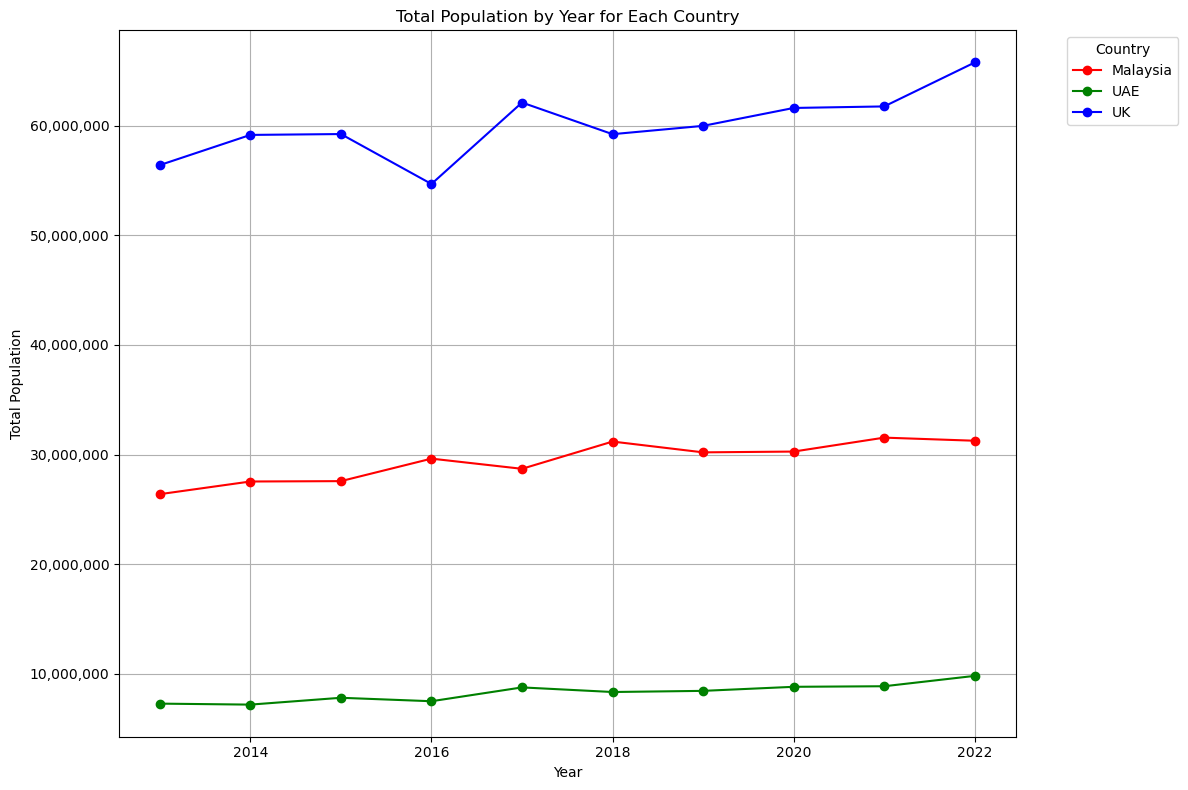

In [22]:
# Import necessary libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load the data from the JSON file
with open('data/Merged_data.json', 'r') as f:
    df = json.load(f)
# Convert JSON data to pandas DataFrame
df = pd.DataFrame(df)
# Group by 'Country Name' and 'Year', then sum the population for each country each year
population_by_country_year = df.groupby(['Country Name', 'Year'])['PopTotal'].sum().unstack()

# Define colors for each country
country_colors = {
    'UK': 'blue',
    'UAE': 'green',
    'Malaysia': 'red'}
def get_color(country):
    return country_colors.get(country, 'gray')  # Default to gray if country is not in the dictionary

# Create a formatter function to format y-axis values
def currency_formatter(x, pos):
    return f'{int(x):,}'  # Use commas as thousands separator

# Plotting the total population for each country across years
plt.figure(figsize=(12, 8))
# Plot each country's population over the years
for country in population_by_country_year.index:
    plt.plot(population_by_country_year.columns, population_by_country_year.loc[country], marker='o', color=get_color(country), label=country)
plt.title('Total Population by Year for Each Country')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
# Apply the custom y-axis formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
# Adjust layout and show plot
plt.tight_layout()
plt.show()


This script plots the population growth over the years for three countries: United Kingdom (UK), United Arab Emirates (UAE), and Malaysia. I have checked that this data is consistent with the available online sources. We observe a slow overall population growth in all three countries, despite a slight decline in 2016 in the United Kingdom, which could possibly be linked to Brexit.

Plot of GDP in each country over time

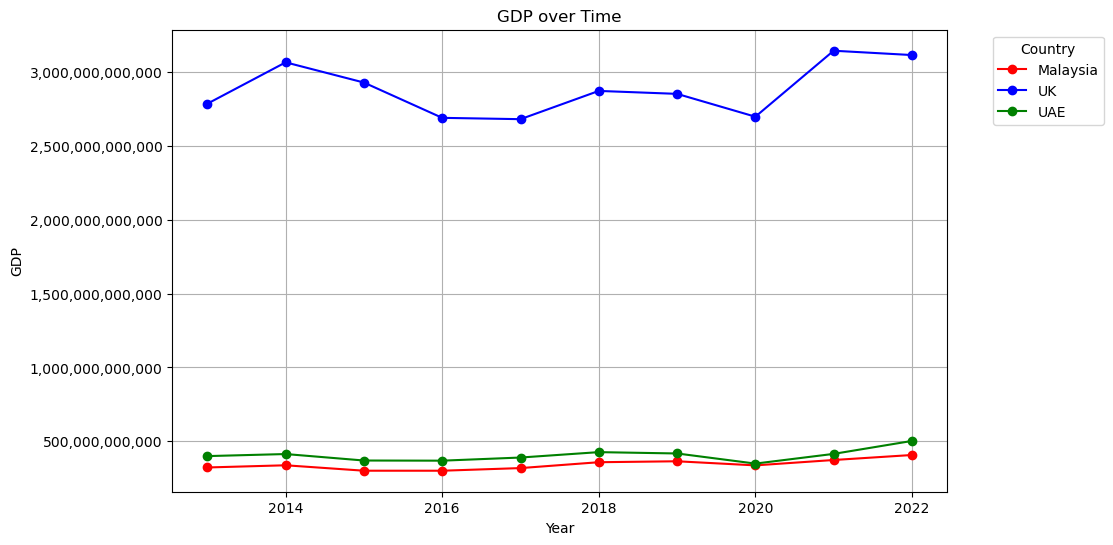

In [23]:
# Load the data from the JSON file
with open('data/Merged_data.json', 'r') as file:
    data = json.load(file)
# Extract country names, years, and GDP
countries = set(entry['Country Name'] for entry in data)
years = sorted(set(entry['Year'] for entry in data))
# Create a dictionary to store GDP by country and year
gdp_data = {country: {year: None for year in years} for country in countries}
for entry in data:
    gdp_data[entry['Country Name']][entry['Year']] = entry['GDP']

# Define colors for each country
country_colors = {
    'UK': 'blue',
    'UAE': 'green',
    'Malaysia': 'red'}
def get_color(country):
    return country_colors.get(country, 'gray')  # Default to gray if country is not in the dictionary

# Plotting the GDP data over time
plt.figure(figsize=(10, 6))
for country, gdp_by_year in gdp_data.items():
    plt.plot(years, [gdp_by_year[year] for year in years], label=country, color=get_color(country), marker='o')
# Adding the title and labels
plt.title('GDP over Time')
plt.xlabel('Year')
plt.ylabel('GDP')
# Adding the legend to differentiate countries
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
# Adding a grid for better readability
plt.grid(True)
# Formatter function to add ',' as thousand separator
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)
# Show the plot
plt.show()

The GDP remains relatively stable with a slow upward trend, but the UK experienced a decline starting in 2016, possibly due to Brexit related incertainties. Additionally, all three countries saw a drop in GDP in 2020, likely caused by the COVID-19 pandemic and lockdown measures. This highlights the economic impact of major geopolitical and global health events on national economies.

Plot of GDP per Inhabitant in each country over time

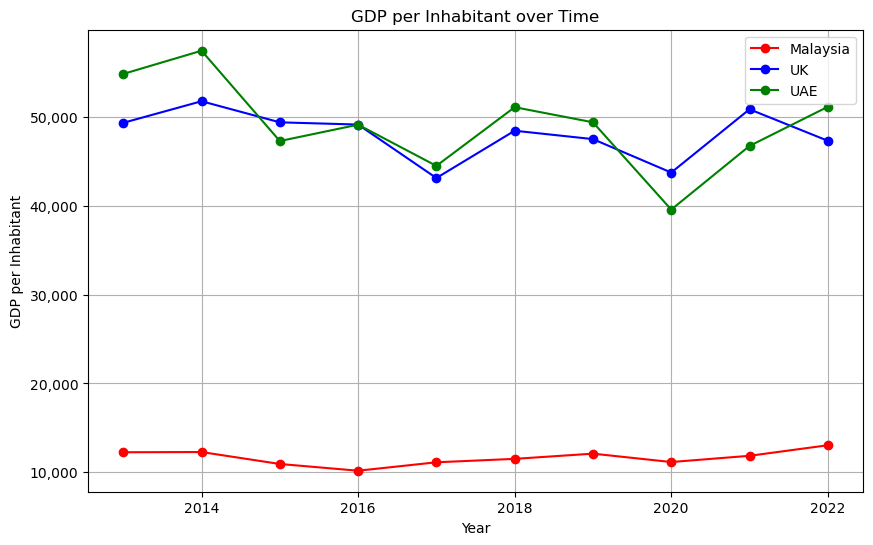

In [24]:
# Load the data from the JSON file
with open('data/Merged_data.json', 'r') as file:
    data = json.load(file)

# Extract country names, years, and perWorkerGDP
countries = set(entry['Country Name'] for entry in data)
years = sorted(set(entry['Year'] for entry in data))
# Create a dictionary to store perWorkerGDP by country and year
gdp_data = {country: {year: None for year in years} for country in countries}
for entry in data:
    gdp_data[entry['Country Name']][entry['Year']] = entry['perPopGDP']
# Define colors for seach country
country_colors = {
    'UK': 'blue',
    'UAE': 'green',
    'Malaysia': 'red'}
def get_color(country):
    return country_colors.get(country, 'gray')  # Default to gray if country is not in the dictionary
# Plotting the data
plt.figure(figsize=(10, 6))
for country, gdp_by_year in gdp_data.items():
    plt.plot(years, [gdp_by_year[year] for year in years], label=country, color=get_color(country), marker='o')
plt.title('GDP per Inhabitant over Time')
plt.xlabel('Year')
plt.ylabel('GDP per Inhabitant')
plt.legend()
plt.grid(True)
# Formatter function to add ',' as thousand separator
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)
# Formatter function to add space as thousand separator (alternative)
#formatter = FuncFormatter(lambda x, pos: f'{int(x):,}'.replace(',', ' '))
#plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

The GDP per inhabitant has been steadily decreasing in both the UK and the UAE, while showing a slow but consistent increase in Malaysia. The impact of Brexit is still visible in the UK's decline starting in 2016, and all three countries experienced a noticeable drop in 2020 due to the economic consequences of the COVID-19 pandemic.

2. Compute the number of potential working population for each of the 3 different nations (UK, UAE, Malaysia) by year.  

   Hint: generally this is from 15 or 16 to retirement age.  State your source of information on the legal age to work and on the retirement age, as well as assumptions that you may make. (Note: retirement age may change over time).

The minimum age for employment and the standard retirement age vary across the UK, UAE, and Malaysia.

**United Kingdom (UK)**:

**Minimum Age to Work**: In the UK, the minimum age for employment is 13. However, there are restrictions on the types of work and the hours that individuals under **16** can perform.

(source [gov.uk]: https://www.gov.uk/child-employment)

**Retirement Age**: The UK does not have a mandatory retirement age. Individuals can choose to retire at any age, but the age at which they can access their state pension is subject to change. As of February 2025, the minimum age to access full state pension us **66** years old. 

(source [Wikipédia]: https://en.wikipedia.org/wiki/Retirement_age)

(Note: Between 2010 and 2018 the state pension age for women rose from 60 to 65, so that it became the same as that for men. Between 2018 and 2020 it then rose from age 65 to 66 for both men and women. 

(source [Institute for Fiscal Studies]: https://ifs.org.uk/articles/planned-increase-state-pension-age-67-68#:~:text=Between%202010%20and%202018%20the,due%20to%20rise%20to%2067.

[commonslibrary]: https://commonslibrary.parliament.uk/research-briefings/cbp-9967/#:~:text=The%20Pensions%20Act%201995%20legislated,to%2065%20to%20November%202018. ))

**United Arab Emirates (UAE)**:

**Minimum Age to Work**: The minimum age for employment in the UAE is **18**. However, individuals aged 15 to 18 can work under specific conditions with a juvenile work permit. 

(source [U.AE]: https://u.ae/en/information-and-services/jobs/employment-and-training-of-minors)

**Retirement Age**: The standard retirement age in the UAE is **60** years. However, employees aged 60 to 65 can continue working if their employer successfully applies for a work permit renewal. Beyond 65, permits are granted on a case-by-case basis, often at a higher cost. 

(source [Wikipédia]: https://en.wikipedia.org/wiki/Retirement_age)

**Malaysia**:

**Minimum Age to Work**: In Malaysia, the minimum age for employment is 13. However, there are restrictions on the types of work and the hours that individuals under **15** can perform.

(source [unicef]: https://www.unicef.cn/sites/unicef.org.china/files/2020-12/Malaysia-summary-ENG.pdf)

**Retirement Age**: The minimum retirement age in Malaysia is **60** years for private-sector employees, as stipulated by the Minimum Retirement Age Act 2012. 

(source [Wikipédia]: https://en.wikipedia.org/wiki/Retirement_age)

Without taking into account the retirement age change in the UK between 2010 and 2020

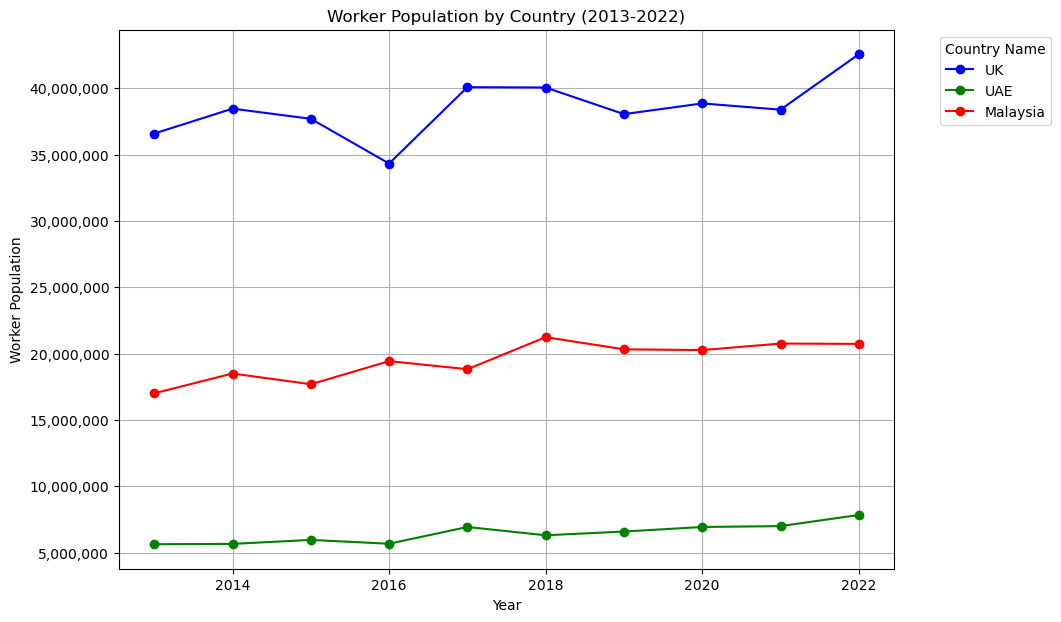

    Location  Time  PopTotal  WorkerPopulation
0   Malaysia  2013  17012674          17012674
1   Malaysia  2014  18501481          18501481
2   Malaysia  2015  17694041          17694041
3   Malaysia  2016  19433770          19433770
4   Malaysia  2017  18827370          18827370
5   Malaysia  2018  21240300          21240300
6   Malaysia  2019  20325554          20325554
7   Malaysia  2020  20269028          20269028
8   Malaysia  2021  20758824          20758824
9   Malaysia  2022  20734982          20734982
10       UAE  2013   5638824           5638824
11       UAE  2014   5663133           5663133
12       UAE  2015   5963275           5963275
13       UAE  2016   5675126           5675126
14       UAE  2017   6936951           6936951
15       UAE  2018   6313510           6313510
16       UAE  2019   6594853           6594853
17       UAE  2020   6936493           6936493
18       UAE  2021   7003931           7003931
19       UAE  2022   7842568           7842568
20        UK 

In [25]:
# Load the GDP data
gdp_data = pd.read_excel('data/Wrangled_GDP.xlsx')
# Load the population data
pop_data = pd.read_csv('data/Wrangled_WPP2024_ByAge.csv')

# Clean the "AgeGrp" column
pop_data["AgeGrp"] = pop_data["AgeGrp"].replace("100+", "100").astype(int)
# Clean the 'PopTotal' column to ensure it's numeric (removes any periods, if present)
pop_data['PopTotal'] = pop_data['PopTotal'].astype(str).str.replace('.', '', regex=False).astype(int)

# Define age filters for the countries
age_filters = {
    'UK': (16, 66),
    'UAE': (18, 60),
    'Malaysia': (15, 60)}
# Apply the age filter dynamically based on the country
filtered_population = []
for country, (min_age, max_age) in age_filters.items():
    country_filter = (pop_data["Location"] == country) & (pop_data["AgeGrp"] >= min_age) & (pop_data["AgeGrp"] <= max_age)
    filtered_population.append(pop_data[country_filter])
# Combine the filtered data for all countries
worker_population = pd.concat(filtered_population)
# Group by country and year, summing the population
worker_population_regrouped = worker_population.groupby(["Location", "Time"])["PopTotal"].sum().reset_index()
# Add a new column "WorkerPopulation" with the sum of the filtered population
worker_population_regrouped["WorkerPopulation"] = worker_population.groupby(["Location", "Time"])["PopTotal"].sum().reset_index()["PopTotal"]

# Define colors for each country
country_colors = {
    'UK': 'blue',
    'UAE': 'green',
    'Malaysia': 'red'}
def get_color(country):
    return country_colors.get(country, 'gray')  # Default to gray if country is not in the dictionary
# Plot the graph
plt.figure(figsize=(10, 7))
# Define countries and their corresponding colors
countries = ["UK", "UAE", "Malaysia"]
# Plot data for each country
for country in countries:
    worker_data = worker_population_regrouped.loc[worker_population_regrouped["Location"] == country]
    plt.plot(worker_data["Time"], worker_data["WorkerPopulation"], label=country, marker='o', color=get_color(country))
# Add labels, title, and grid
plt.xlabel("Year")
plt.ylabel("Worker Population")
plt.title("Worker Population by Country (2013-2022)")
plt.legend(title='Country Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)
# Show the plot
plt.show()

print(worker_population_regrouped)


The worker population appears to follow the same trend as the total population. In the UK, there is a decline starting in 2016, followed by a slow recovery. Meanwhile, the UAE and Malaysia show a steady but slow growth in their worker populations over time.

In [26]:
#code to reorder the data based on the desired order of countries and years

# Load the JSON data from a file
with open("data/Merged_data.json", "r") as file:
    data = json.load(file)
# Define the desired order of countries
order = ["Malaysia", "UAE", "UK"]
# Sort data based on the country order and year
sorted_data = sorted(data, key=lambda x: (order.index(x["Country Name"]), x["Year"]))
# Save the reordered data back to a new JSON file
with open("data/Merged_data.json", "w") as file:
    json.dump(sorted_data, file, indent=2)

# code to add the 'WorkerPopulation' column to the merged data and save it back to the JSON file

with open('data/Merged_data.json', 'r') as file:
    data = json.load(file)
# Convert the data to a DataFrame
df = pd.DataFrame(data)
df['WorkerPopulation'] = worker_population_regrouped['WorkerPopulation']
# Save the updated DataFrame to a new JSON file
df.to_json('data/Merged_data.json', orient='records', lines=False, indent=1)
print (df)

   Country Name  Year           GDP  PopTotal     perPopGDP  WorkerPopulation
0      Malaysia  2013  3.232762e+11  26392079  12248.987112          17012674
1      Malaysia  2014  3.380661e+11  27547235  12272.233315          18501481
2      Malaysia  2015  3.013553e+11  27580633  10926.336135          17694041
3      Malaysia  2016  3.012560e+11  29632094  10166.545566          19433770
4      Malaysia  2017  3.191091e+11  28704813  11116.919457          18827370
5      Malaysia  2018  3.587888e+11  31189631  11503.465550          21240300
6      Malaysia  2019  3.651777e+11  30204879  12090.024298          20325554
7      Malaysia  2020  3.374562e+11  30277033  11145.615357          20269028
8      Malaysia  2021  3.737848e+11  31548017  11848.124200          20758824
9      Malaysia  2022  4.076058e+11  31263962  13037.561949          20734982
10          UAE  2013  4.002185e+11   7291555  54887.953221           5638824
11          UAE  2014  4.141054e+11   7201500  57502.654552     

Taking into account the retirement age change in the UK between 2010 and 2020

(Does't work at the moment)

In [ ]:
"""
# Load the GDP data
gdp_data = pd.read_excel('data/Wrangled_GDP.xlsx')
# Load the population data
pop_data = pd.read_csv('data/Wrangled_WPP2024_ByAge.csv')

wpp_reduced = pop_data  

# Clean the "AgeGrp" column to ensure it's numeric (100+ to 100)
wpp_reduced["AgeGrp"] = wpp_reduced["AgeGrp"].replace("100+", "100").astype(int)
# Clean the 'PopTotal' column to ensure it's numeric (removes any periods, if present)
wpp_reduced['PopTotal'] = wpp_reduced['PopTotal'].astype(str).str.replace('.', '', regex=False).astype(int)

# Define age filters for the countries with UK pension age considerations
def get_uk_age_filter(year):
    #Returns the maximum age for the UK based on the pension age policy for that year.
    #The pension age gradually rises from 60 in 2010 to 65 by 2018, and then to 66 by 2020.
    if 2010 <= year <= 2018:
        # Gradually rising from 60 to 65 for women
        age_increase = (year - 2010) * (65 - 60) / (2018 - 2010)  # Linear increase from 60 to 65
        max_age = 60 + age_increase  # Start at 60.5 and increase over time
        return round(max_age)  # Round to the nearest whole number because age is in whole years in our dataset
    elif 2018 < year <= 2020:
        # Gradually rising from 65 to 66 for women and men
        age_increase = (year - 2018) * (66 - 65) / (2020 - 2018)  # Linear increase from 65 to 66
        max_age = 65 + age_increase  # Start at 65 and increase to 66
        return round(max_age)  # Round to the nearest whole number (e.g., 65.5 -> 66)
    else:
        return 66  # After 2020, the pension age is 66 for both


# Apply the age filter dynamically based on the country and year
filtered_population = []

for country, (min_age, max_age) in age_filters.items():
    if country == 'UK':
        # Apply the dynamic age filter based on year
        for year in wpp_reduced['Time'].unique():
            max_age = get_uk_age_filter(year)
            country_filter = (wpp_reduced["Location"] == country) & (wpp_reduced["AgeGrp"] >= min_age) & (wpp_reduced["AgeGrp"] <= max_age) & (wpp_reduced["Time"] == year)
            filtered_population.append(wpp_reduced[country_filter])
    else:
        country_filter = (wpp_reduced["Location"] == country) & (wpp_reduced["AgeGrp"] >= min_age) & (wpp_reduced["AgeGrp"] <= max_age)
        filtered_population.append(wpp_reduced[country_filter])


# Define colors for each country
country_colors = {
    'UK': 'blue',
    'UAE': 'green',
    'Malaysia': 'red'}
def get_color(country):
    return country_colors.get(country, 'gray')  # Default to gray if country is not in the dictionary

# Plot the graph
plt.figure(figsize=(10, 7))
# Define countries and their corresponding colors
countries = ["UK", "UAE", "Malaysia"]
# Plot data for each country
for country in countries:
    worker_data = worker_population_regrouped.loc[worker_population_regrouped["Location"] == country]
    plt.plot(worker_data["Time"], worker_data["WorkerPopulation"], label=country, marker='o', color=get_color(country))
# Add labels, title, and grid
plt.xlabel("Year")
plt.ylabel("Worker Population")
plt.title("Worker Population by Country (2013-2022)")
plt.legend(title='Country Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)
# Show the plot
plt.show()
# Print the regrouped worker population data for verification
print(worker_population_regrouped)
"""

If this code worked, we would have observed no change in the number of workers in the UAE and Malaysia. However, for the UK, we would have seen a significant drop starting in 2013, with the gap closing by 2020, and then no difference from 2020 to 2023.

3. Instead of GDP per population (GDPpercapita), what about GDP per working population?  What are your assumptions and opinions on using this (GDP per working population) measure?

GDP per working population might be a better indicator than GDP per inhabitant but ignores those of working age without jobs. A better metric might be GDP per licensed driver, as it captures both workers and retirees who participate in the economy. The retired population remains economically active, often wealthier than the median worker, allowing them to buy cars and contribute to the market.


   Country Name  Year           GDP  PopTotal     perPopGDP  WorkerPopulation  \
0      Malaysia  2013  3.232762e+11  26392079  12248.987112          17012674   
1      Malaysia  2014  3.380661e+11  27547235  12272.233315          18501481   
2      Malaysia  2015  3.013553e+11  27580633  10926.336135          17694041   
3      Malaysia  2016  3.012560e+11  29632094  10166.545566          19433770   
4      Malaysia  2017  3.191091e+11  28704813  11116.919457          18827370   
5      Malaysia  2018  3.587888e+11  31189631  11503.465550          21240300   
6      Malaysia  2019  3.651777e+11  30204879  12090.024298          20325554   
7      Malaysia  2020  3.374562e+11  30277033  11145.615357          20269028   
8      Malaysia  2021  3.737848e+11  31548017  11848.124200          20758824   
9      Malaysia  2022  4.076058e+11  31263962  13037.561949          20734982   
10          UAE  2013  4.002185e+11   7291555  54887.953221           5638824   
11          UAE  2014  4.141

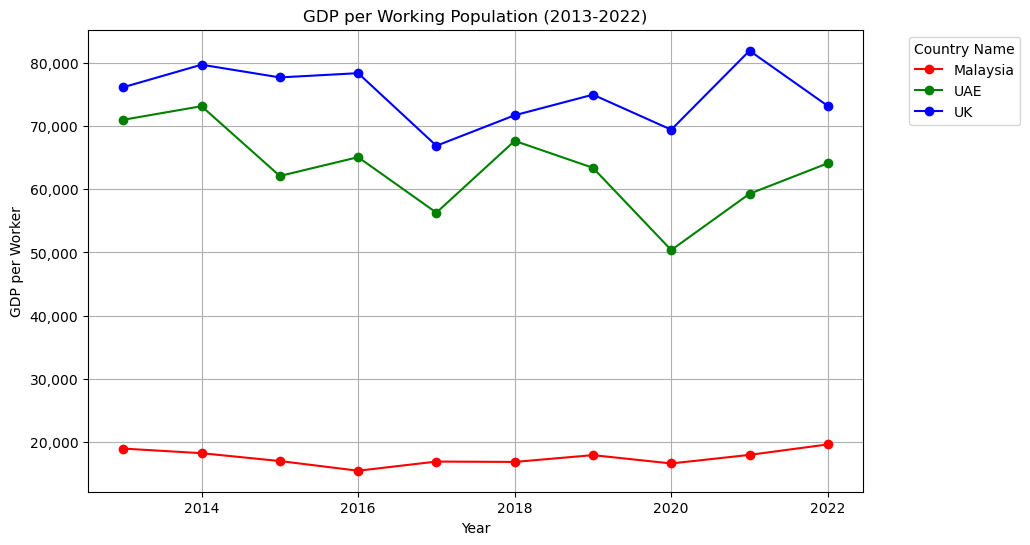

In [27]:
# Load JSON data
with open('data/Merged_data.json', 'r') as file:
    data = json.load(file)
# Convert to DataFrame
df = pd.DataFrame(data)

# Compute GDP per working population
df['GDP_per_Worker'] = df['GDP'] / df['WorkerPopulation']
print(df)

# Define colors for each country
country_colors = {
    'UK': 'blue',
    'UAE': 'green',
    'Malaysia': 'red'}
def get_color(country):
    return country_colors.get(country, 'gray')  # Default to gray if country is not in the dictionary

# Plot
plt.figure(figsize=(10, 6))
for country in df['Country Name'].unique():
    country_data = df[df['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['GDP_per_Worker'], marker='o', label=country, color=get_color(country))

plt.xlabel('Year')
plt.ylabel('GDP per Worker')
plt.title('GDP per Working Population (2013-2022)')
plt.legend(title='Country Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.grid(True)
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


Obviously, GDP per worker is higher than GDP per inhabitant. We can observe that the UK and UAE, which were close in terms of GDP per inhabitant, are now more separated, suggesting that the UK has a higher proportion of workers relative to its total population. However, the best ratio seems to be Malaysia, where the GDP per worker is nearly double the GDP per inhabitant.

4. Compare GDP, GDP per population, GDP per working population against that of the number of vehicles sold. Choose the appropriate visualisation and provide insights with substantiated references.  For example, you may want to justify the insights based on cultural influence, better public transport, vehicle cost of ownership, and/or any other reasons. This is the story telling part, but you do need to substantiate it with factual references,

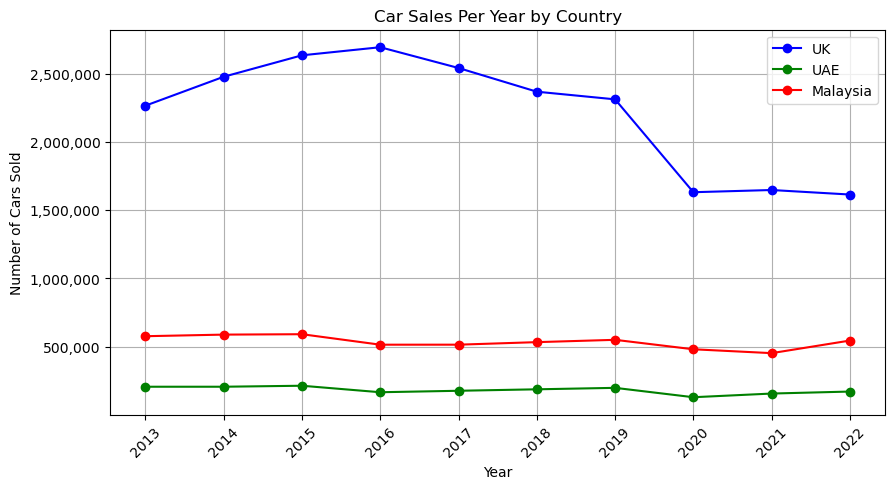

In [28]:
# Load the JSON data from the file
with open('data/Wrangled_vehicle.json', 'r') as file:
    json_data = json.load(file)
# Extract years dynamically from the first entry (excluding "Nation")
years = sorted([int(year) for year in json_data[0] if year.isdigit()])

# Define colors for each country
country_colors = {
    'UK': 'blue',
    'UAE': 'green',
    'Malaysia': 'red'}
# Plot data
plt.figure(figsize=(10, 5))
for country_data in json_data:
    country = country_data["Nation"]
    sales = [country_data[str(year)] for year in years]  # Convert year to string for dictionary access
    plt.plot(years, sales, marker='o', label=country, color=country_colors.get(country))
# Customize plot
plt.xlabel("Year")
plt.ylabel("Number of Cars Sold")
plt.title("Car Sales Per Year by Country")
plt.xticks(years, rotation=45)
plt.legend()
plt.grid(True)
# Format the y-axis 
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)
# Show the plot
plt.show()


The number of cars sold in the UAE and Malaysia appears to be fairly stable over time. However, in the UK, there is a gradual decline in sales starting from 2016, followed by a sharp drop in 2020 during the COVID lockdown. Sales have never fully recovered to pre-COVID levels, likely due to factors such as the rise in remote work, increased bike usage, and greater reliance on public transport.

This code merges the vehicle data into Merged_data.json, adding the number of vehicles for each country and year, and saves the updated dataset.

In [29]:
# Load Merged_data.json
with open("data/Merged_data.json", "r") as f:
    merged_data = json.load(f)
# Load Wrangled_vehicule.json
with open("data/Wrangled_vehicle.json", "r") as f:
    vehicle_data = json.load(f)

# Create a lookup dictionary for vehicle data
vehicle_dict = {entry["Nation"]: {str(year): entry[str(year)] for year in range(2013, 2023)} for entry in vehicle_data}
# Merge data
for entry in merged_data:
    country = entry["Country Name"]
    year = str(entry["Year"])  # Convert year to string for dictionary lookup
    if country in vehicle_dict and year in vehicle_dict[country]:
        entry["Vehicles"] = vehicle_dict[country][year]
    else:
        entry["Vehicles"] = None  # If no data is found, set to None

# Save the merged JSON
with open("data/Merged_data.json", "w") as f:
    json.dump(merged_data, f, indent=4)

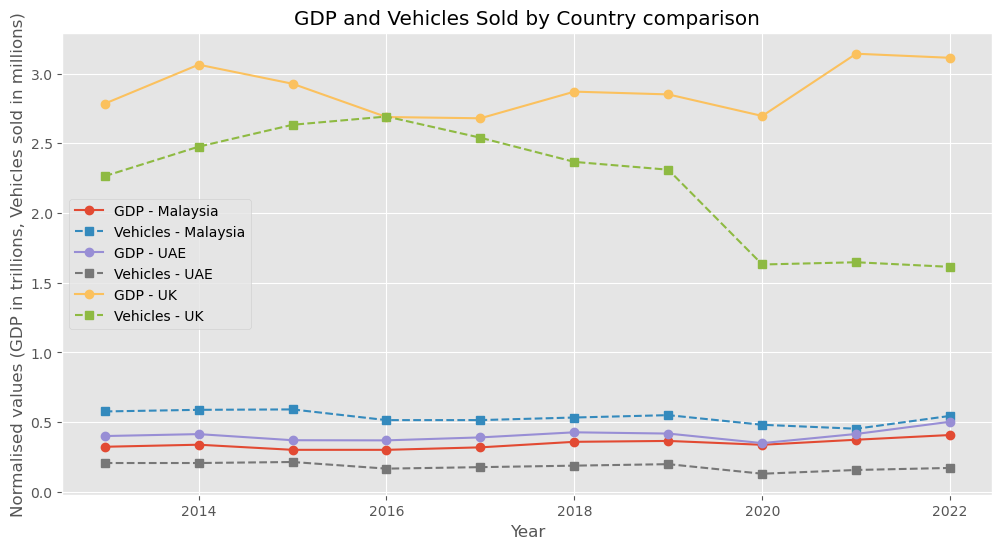

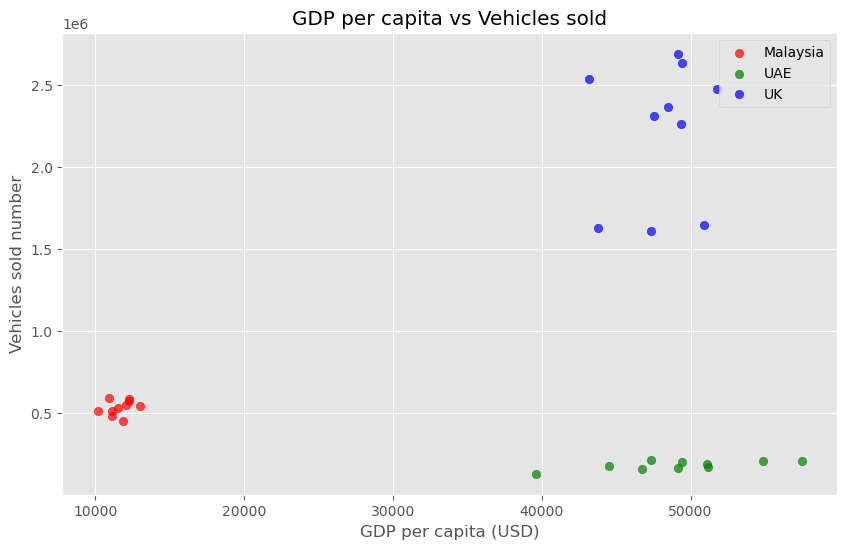

In [30]:
# Load the merged data
with open("data/Merged_data.json", "r") as file:
    data = json.load(file)
df = pd.DataFrame(data)
# Select the columns of interest 
countries = df["Country Name"].unique()

plt.style.use("ggplot")
plt.figure(figsize=(12, 6))
# Comapre GDP and Vehicles sold for each country
for country in countries:
    subset = df[df["Country Name"] == country]
    plt.plot(subset["Year"], subset["GDP"] / 1e12, marker="o", linestyle="-", label=f"GDP - {country}")
    plt.plot(subset["Year"], subset["Vehicles"] / 1e6, marker="s", linestyle="--", label=f"Vehicles - {country}")
plt.xlabel("Year")
plt.ylabel("Normalised values (GDP in trillions, Vehicles sold in millions)")
plt.title("GDP and Vehicles Sold by Country comparison")
plt.legend()
plt.show()

# Scatter plot GDP per capita vs Vehicles sold
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors  
country_colors = {
    'UK': 'blue',
    'UAE': 'green',
    'Malaysia': 'red'}
for country in countries:
    subset = df[df["Country Name"] == country]
    plt.scatter(subset["perPopGDP"], subset["Vehicles"], color=country_colors[country], label=country, alpha=0.7)
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Vehicles sold number") 
plt.title("GDP per capita vs Vehicles sold")
plt.legend()
plt.show()


#### Interpretation

* Malaysia has a high volume of vehicle sales despite a relatively low GDP per capita, a phenomenon that can be attributed to several factors. A strong car culture plays a significant role, with personal vehicle ownership being widely regarded as a symbol of status and convenience. Additionally, Malaysia's automotive industry is supported by national car manufacturers such as Proton and Perodua, which produce affordable vehicles tailored to local consumers. Limited public transportation infrastructure in certain regions further incentivizes car ownership, as many Malaysians rely on personal vehicles for daily commuting. Government policies, including tax incentives and protectionist measures favoring domestic car brands, also contribute to the high rate of car ownership in the country.

(source [Quora]: https://www.quora.com/Why-does-Malaysia-have-the-highest-passenger-car-ownership-rate-in-SE-Asia

[Wikipédia]: https://en.wikipedia.org/wiki/Automotive_industry_in_Malaysia )

* The United Kingdom has a higher GDP but a mature automotive market, where car sales have been declining in recent years. This decline can be attributed to several factors, including improvements in public transportation infrastructure, a growing preference for alternative mobility solutions such as ride-sharing and cycling, and an increase in remote working, which has reduced the need for personal vehicles. Additionally, economic uncertainty and rising costs of car ownership, including insurance and fuel prices, have contributed to weaker demand.

(source [sky]: https://news.sky.com/story/new-car-sales-fall-in-uk-as-europes-manufacturers-feel-strain-from-weak-demand-13209442#:~:text=News%20%7C%20Sky%20News-,New%20car%20sales%20fall%20in%20UK%20as%20Europe%27s%20manufacturers%20feel,must%20do%20more%20to%20help. 

[lease fetcher]: https://www.leasefetcher.co.uk/content/remote-working-and-car-ownership )

* The United Arab Emirates exhibits a more fluctuating relationship in vehicle sales, which can likely be attributed to several key factors. The country's demographics play a major role, as a significant portion of the population consists of expatriates, whose presence and purchasing power are influenced by economic conditions, visa policies, and job market stability. Additionally, the high cost of living, particularly in cities like Dubai and Abu Dhabi, affects consumer spending patterns, including car ownership. Fluctuations in oil prices and government policies, such as fuel subsidies or taxation changes, also contribute to variations in vehicle demand. Furthermore, the UAE's well-developed public transportation infrastructure, including metro systems and ride-sharing services, provides alternatives to car ownership, influencing overall market trends.

(source [dubizzle]: https://www.dubizzle.com/blog/cars/impact-fuel-prices-uae-auto-market/

[faster capital]: https://fastercapital.com/content/UAE-Local-Market-Dynamics--Automotive-Market-Trends---Desert-Drives--Automotive-Market-Trends-in-the-UAE.html )

The output consists of four line plots, each illustrating the percentage change over the years for different metrics across the selected countries: Malaysia, UAE, and the UK. 

1. The first plot shows the percentage increase in the total population for each country, revealing trends in population growth over the years.

2. The second plot focuses on the working population, highlighting how the labor force has evolved in each country.

3. The third plot depicts the percentage change in GDP, showing the economic growth or decline in the selected countries.

4. The final plot illustrates the percentage change in vehicle sales, which provides insight into the automotive market trends in these countries.

Each plot will display clear trends, with the countries represented by distinct colors for easy comparison.

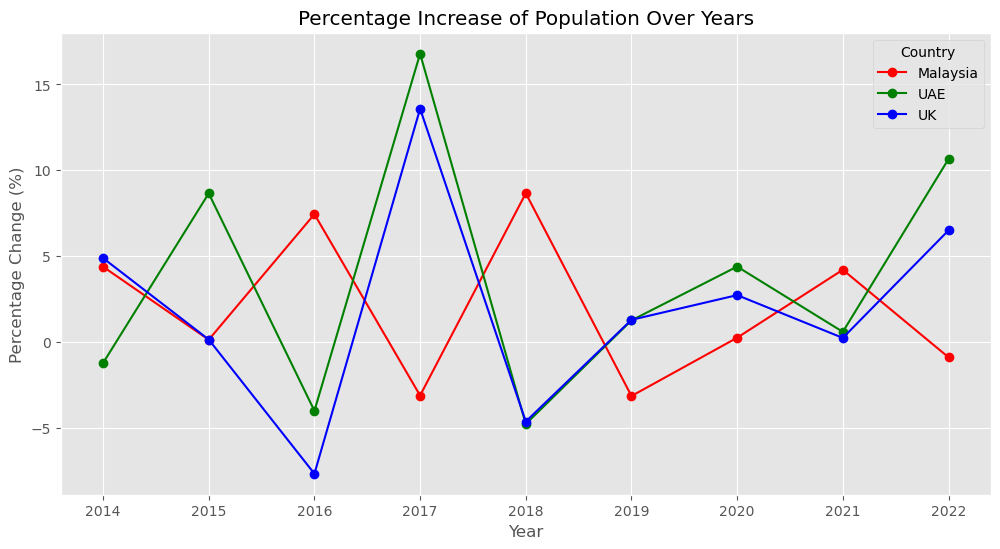

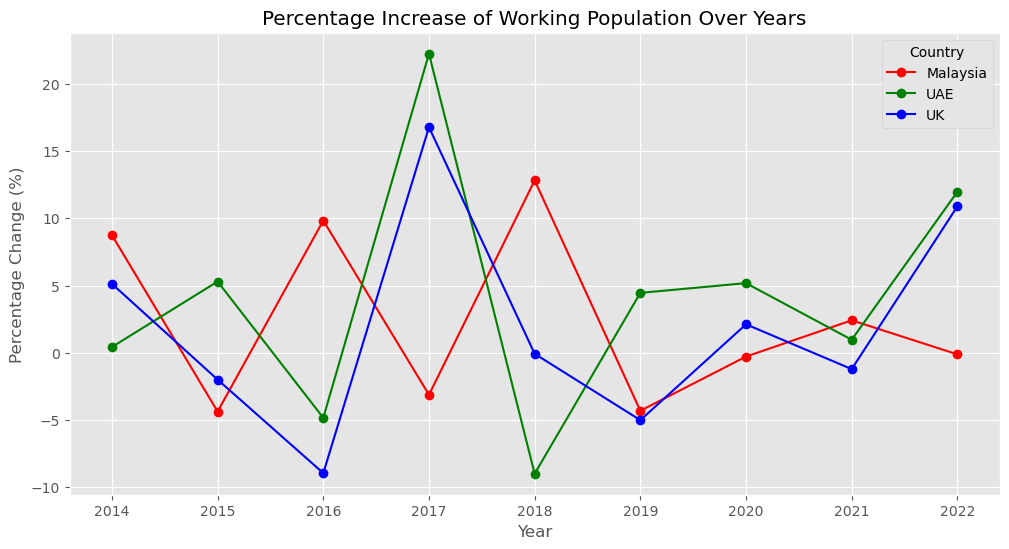

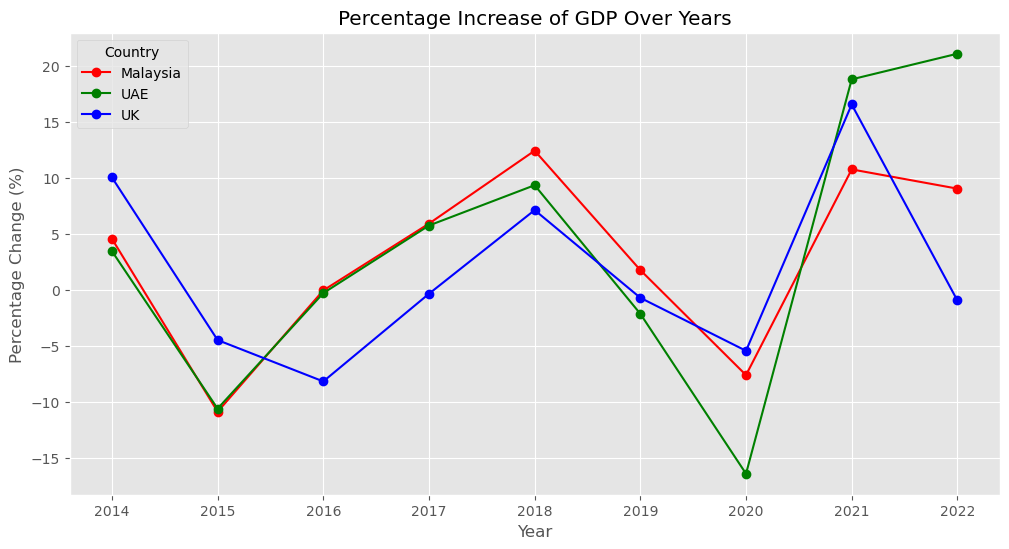

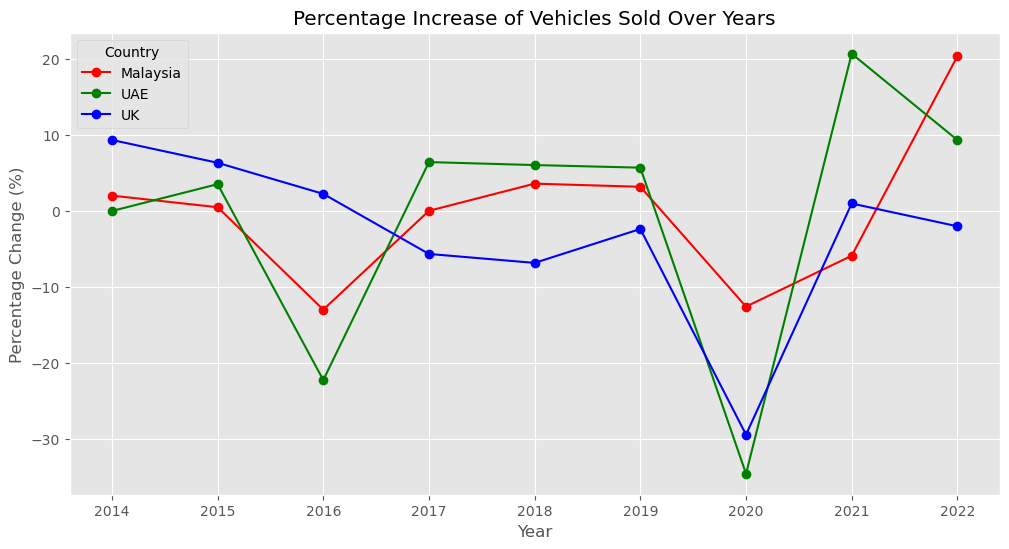

In [31]:
# Load the JSON data 
with open('data/Merged_data.json', 'r') as file:
    data = json.load(file)
# Convert JSON data to a Pandas DataFrame
df = pd.DataFrame(data)
# Filter data for selected countries
selected_countries = ['Malaysia', 'UAE', 'UK']
df = df[df['Country Name'].isin(selected_countries)]

# Define colors for each country
country_colors = {
    'UK': 'blue',
    'UAE': 'green',
    'Malaysia': 'red'}

# Compute Percentage Increase for Population, Working Population, GDP, and Vehicle Sales
df_sorted = df.sort_values(by=['Country Name', 'Year'])
df_sorted['Population_Perc_Change'] = df_sorted.groupby('Country Name')['PopTotal'].pct_change() * 100
df_sorted['WorkerPopulation_Perc_Change'] = df_sorted.groupby('Country Name')['WorkerPopulation'].pct_change() * 100
df_sorted['GDP_Perc_Change'] = df_sorted.groupby('Country Name')['GDP'].pct_change() * 100
df_sorted['Vehicles_Perc_Change'] = df_sorted.groupby('Country Name')['Vehicles'].pct_change() * 100

# Function to plot data
def plot_data(y_column, title, ylabel):
    plt.figure(figsize=(12, 6))
    for country in selected_countries:
        country_data = df_sorted[df_sorted['Country Name'] == country]
        plt.plot(country_data['Year'], country_data[y_column], marker='o', label=country, color=country_colors[country])
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Year')
    plt.legend(title='Country')
    plt.grid(True)
    plt.show()
# Plot each metric
plot_data('Population_Perc_Change', 'Percentage Increase of Population Over Years', 'Percentage Change (%)')
plot_data('WorkerPopulation_Perc_Change', 'Percentage Increase of Working Population Over Years', 'Percentage Change (%)')
plot_data('GDP_Perc_Change', 'Percentage Increase of GDP Over Years', 'Percentage Change (%)')
plot_data('Vehicles_Perc_Change', 'Percentage Increase of Vehicles Sold Over Years', 'Percentage Change (%)')


The output consists of three plots, each comparing the percentage change in car sales (vehicles sold) with the percentage change in GDP per worker for Malaysia, UAE, and the UK.

For each country, the plot displays two trends: the first is the percentage change in vehicle sales (represented by a line with circles), and the second is the percentage change in GDP per worker (represented by a line with crosses).

The plot for each country has dual y-axes. The left y-axis shows the percentage change in vehicle sales, with a color corresponding to the country's color, while the right y-axis displays the percentage change in GDP per worker in black.

These plots offer insights into the relationship between vehicle sales and economic productivity (GDP per worker) across the countries over the years.

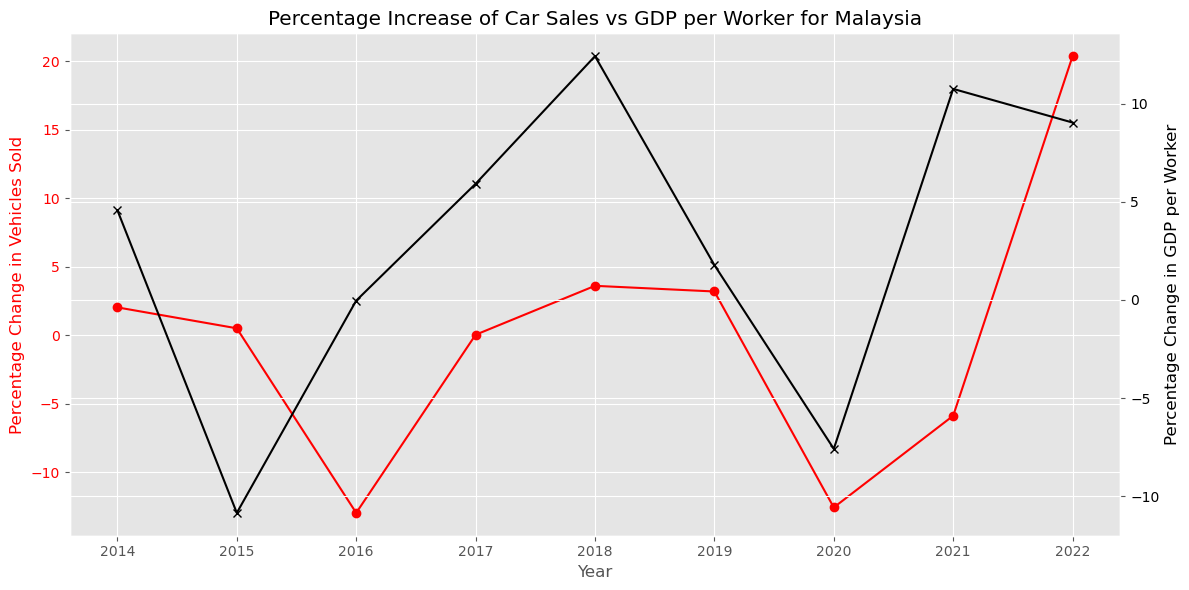

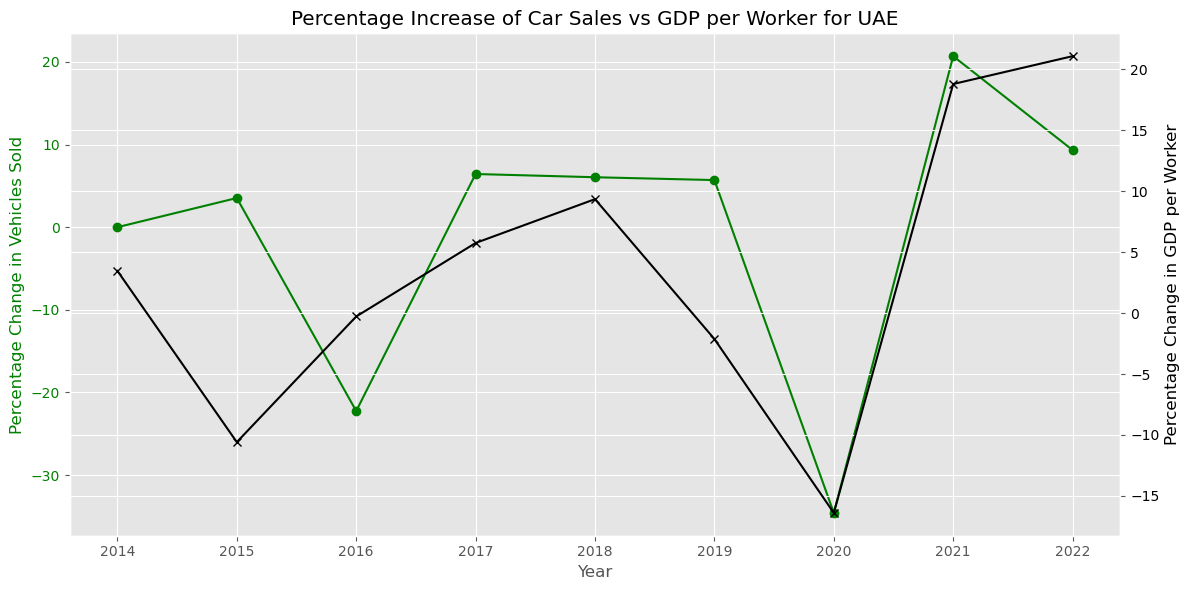

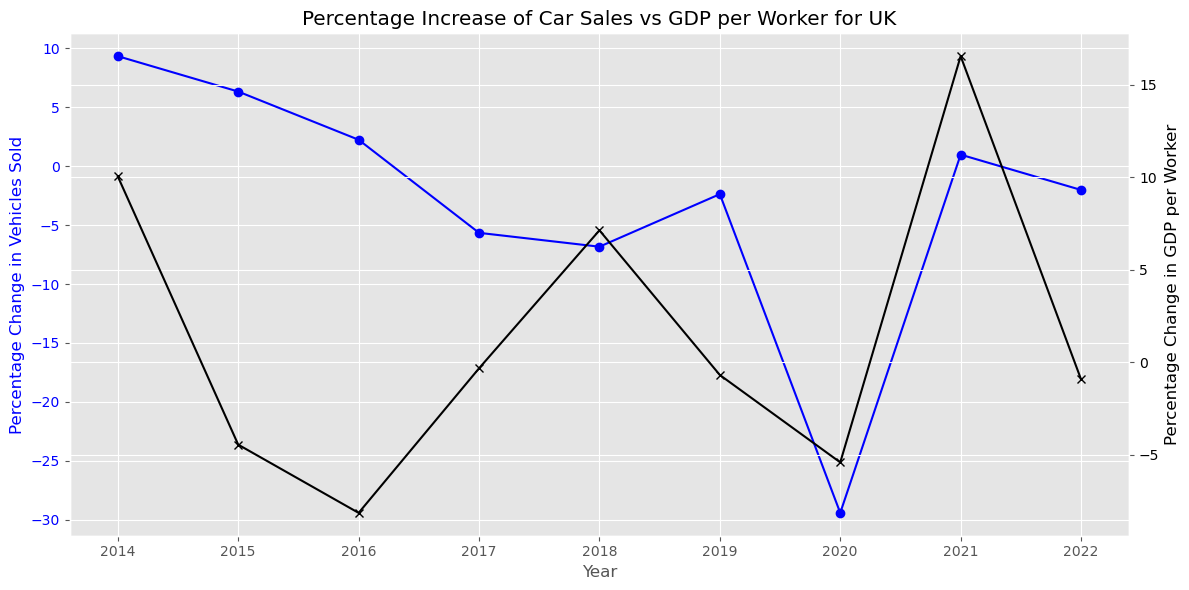

In [32]:
# Load the JSON data  
with open('data/Merged_data.json', 'r') as file:
    data = json.load(file)
# Convert JSON data to a Pandas DataFrame
df = pd.DataFrame(data)
# Filter data for selected countries
selected_countries = ['Malaysia', 'UAE', 'UK']
df = df[df['Country Name'].isin(selected_countries)]

# Define colors for each country
country_colors = {
    'UK': 'blue',
    'UAE': 'green',
    'Malaysia': 'red'}

# Compute Percentage Increase for Population, Working Population, GDP, and Vehicle Sales
df_sorted = df.sort_values(by=['Country Name', 'Year'])
df_sorted['Population_Perc_Change'] = df_sorted.groupby('Country Name')['PopTotal'].pct_change() * 100
df_sorted['WorkerPopulation_Perc_Change'] = df_sorted.groupby('Country Name')['WorkerPopulation'].pct_change() * 100
df_sorted['GDP_Perc_Change'] = df_sorted.groupby('Country Name')['GDP'].pct_change() * 100
df_sorted['Vehicles_Perc_Change'] = df_sorted.groupby('Country Name')['Vehicles'].pct_change() * 100

# Function to plot car sales vs GDP per worker for each country
def plot_car_sales_vs_gdp(country):
    country_data = df_sorted[df_sorted['Country Name'] == country]
    fig, ax1 = plt.subplots(figsize=(12, 6))
    # Plot percentage change in vehicles (car sales)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Percentage Change in Vehicles Sold', color=country_colors[country])
    ax1.plot(country_data['Year'], country_data['Vehicles_Perc_Change'], marker='o', label='Car Sales', color=country_colors[country])
    ax1.tick_params(axis='y', labelcolor=country_colors[country])
    # Create a second y-axis for GDP per worker percentage change
    ax2 = ax1.twinx()
    ax2.set_ylabel('Percentage Change in GDP per Worker', color='black')
    ax2.plot(country_data['Year'], country_data['GDP_Perc_Change'], marker='x', label='GDP per Worker', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    # Add title and legend
    plt.title(f'Percentage Increase of Car Sales vs GDP per Worker for {country}')
    fig.tight_layout()
    plt.show()
# Plot for each selected country
for country in selected_countries:
    plot_car_sales_vs_gdp(country)


In Malaysia and the UAE, there appears to be a correlation between the percentage increase in car sales and the percentage increase in GDP per worker. As car sales grow, there is a noticeable increase in GDP per worker, suggesting a potential link between the two variables. However, this trend does not seem to hold in the UK. Although the trends in car sales and GDP per worker appear relatively similar, the correlation is not as evident, and the two variables do not align as closely as they do in Malaysia and the UAE. This divergence could indicate different economic dynamics at play in the UK, where other factors may influence GDP per worker and vehicle sales more independently.